In [1]:
import numpy as np
import matplotlib.pyplot as plt
from math import sqrt,pi, asin, sin
from scipy.stats import linregress
from numba import jit, prange
import pandas as pd
import os
from scipy.fftpack import fft
from scipy.signal import find_peaks

In [2]:
filename = r'D:\.master\Master\tester logg\Kristin\Test 9.asc'

F_amp = 16.4901 # force amplitude of the test




my_path = os.path.abspath(r'D:\.master\Master\Figurer\Testlogg\Gran')
data = pd.read_csv(filename,sep="\t",skiprows = 38, decimal=',',names = ['Time','Force','Displacement','Dritt','hodor','hodor1'], dtype={'Time': float, 'Force': float,'Displacement': float,'Dritt': float,'hodor': float,'hodor1': float})
#data.columns = ["Time", "Force", "Displacement"] # "4", "5", "6", "7", "8", "9", "10"] 
# ,'hodor','hodor1'
# ,'hodor': float,'hodor1': float

In [3]:
lendata = data.shape[0]
#print('lendata =',lendata)
start = 0 
slutt = lendata 
print(data)

#antall = 200
#hz = antall/hertz


# Divedes the data into numpy arrays for time, displacement and force.
t = data.iloc[start:slutt,0].values  # values converts it into a numpy array
d = data.iloc[start:slutt,2].values  # -1 means that calculate the dimension of rows, but have 1 column
f = data.iloc[start:slutt,1].values
#front = data.iloc[start:slutt,3].values
#back = data.iloc[start:slutt,4].values

t = np.array(t)
d = np.array(d)
f = np.array(f)

print(t,d,f)

#This for-loop will remove the noise and the 5 second envelope time in the beginning of the test

for i in range(lendata):
    if abs(f[i]) + abs(f[i]) > F_amp*2-1:
        #print(i)
        start = i
        #slutt = slutt-i
        t = data.iloc[start:slutt,0].values  # values converts it into a numpy array
        d = data.iloc[start:slutt,2].values  # -1 means that calculate the dimension of rows, but have 1 column
        f = data.iloc[start:slutt,1].values
        break


#print('len f =',len(f))
#for i in range(len(f)):
#    if abs(abs(f[i])+ abs(f[i+50])) < 0.2:
#        print(i)
#        break
        
#index = np.argmin(d)
#print(index)


#front = np.array(front)
#back = np.array(back)
#new_data = np_f.replace(data, 'HD\,', 'HD')
#a = np.char.replace(t,',', '.').astype(float)
#t = t.astype(float)
#d = d.astype(float)
#f = f.astype(float)
#front = front.astype(np.float)
#back = back.astype(np.float)

              Time    Force  Displacement    Dritt    hodor  hodor1
0            0.000  0.06384        -5.957 -0.00136 -0.00555     NaN
1            0.005  0.06990        -5.957 -0.00138 -0.00553     NaN
2            0.010  0.05230        -5.957 -0.00136 -0.00554     NaN
3            0.015  0.04061        -5.957 -0.00133 -0.00556     NaN
4            0.020  0.03369        -5.957 -0.00130 -0.00556     NaN
...            ...      ...           ...      ...      ...     ...
9656996  48285.000  0.87330        -3.979 -1.07000  1.10300     NaN
9656997  48285.000  0.87740        -3.980 -1.07000  1.10300     NaN
9656998  48285.000  0.87720        -3.979 -1.07000  1.10300     NaN
9656999  48285.000  0.87610        -3.979 -1.07000  1.10300     NaN
9657000  48285.000  0.87860        -3.979 -1.07000  1.10300     NaN

[9657001 rows x 6 columns]
[0.0000e+00 5.0000e-03 1.0000e-02 ... 4.8285e+04 4.8285e+04 4.8285e+04] [-5.957 -5.957 -5.957 ... -3.979 -3.979 -3.979] [0.06384 0.0699  0.0523  ... 0.8772 

In [4]:
# The peaks function finds all peaks, and notes the indicies. 
#This approach is used since the frequency of the test was changed during the testing.
peaks1 = find_peaks(f)[0]
peaks = np.array(peaks1)
print(peaks)
#print(len(peaks))
peaks_bunn = [x + 25 for x in peaks]
#print(peaks_bunn)

[     41      80     120 ... 9628508 9628513 9628521]


<IPython.core.display.Javascript object>


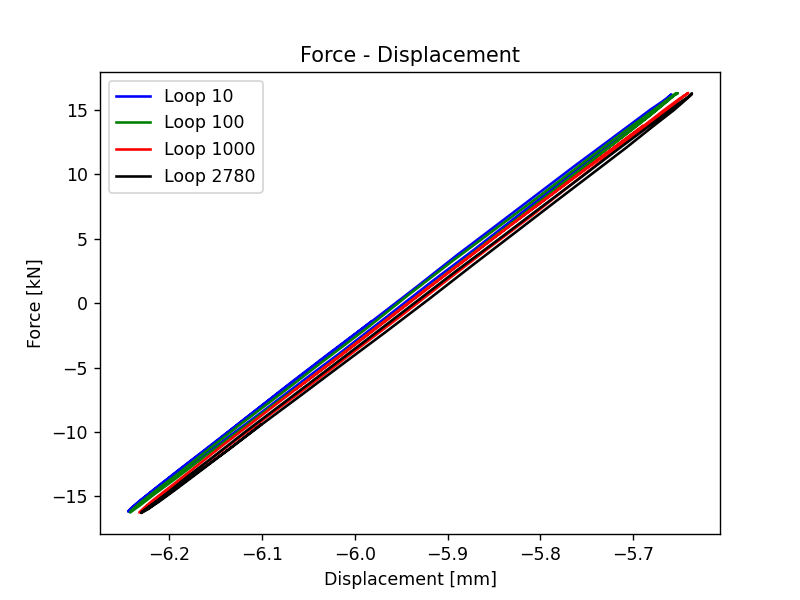

In [27]:
%matplotlib notebook

# This plots several loops of the hysteresis loop. 

oter = (int(len(d)/50)-100)
#for i in range(len(peaks)):
#    plt.plot(d[peaks_bunn[i]:peaks_bunn[i+1]], f[peaks_bunn[i]:peaks_bunn[i+1]],color='red',label = 'Loop 1')
#plt.plot(d[(50*1)+1:50*1+1], f[50*1+1:50*1+1],color='magenta',label = 'Loop 1')
plt.plot(d[(50*10)+1:50*11+1], f[50*10+1:50*11+1],color='blue',label = 'Loop 10')
plt.plot(d[50*100+1:50*101+1], f[50*100+1:50*101+1],color='green',label = 'Loop 100')
plt.plot(d[50*1000+1:50*1001+1], f[50*1000+1:50*1001+1],color='red',label = 'Loop 1000')
plt.plot(d[50*2777+1:50*2778+1], f[50*2777+1:50*2778+1],color='black',label = 'Loop 2780')
#plt.plot(d[50*(oter):51*(oter+1)], f[50*(oter):51*(oter+1)],color='black',label = 'Loop 1379')
#plt.plot(d, f,color='red',label = 'Stiffness')
#plt.plot(NOC, 1-stigningstall/stigningstall[1])
#/stigningstall[1]
#200*(1379-25)

plt.title('Force - Displacement')
plt.ylabel('Force [kN]')
plt.xlabel('Displacement [mm]')
plt.legend()
#save_name3 = filename.split('Kristin')[1] + '.pdf'
#save_name1 = save_name3.split('.asc')[0]+' ' +'F-U' + '.pdf'
save_name2 = r'D:\.master\Master\Figurer\Testlogg\46ind.pdf'
save_name = save_name2 
plt.savefig(save_name) #os.path.join(my_path, save_name)
plt.show()

In [6]:
#%matplotlib notebook
#plt.plot(d[1000000:1001000], f[1000000:1001000],color='blue',label = 'Time-Force')
##[0:1000]
#plt.title('Time - Force')
#plt.ylabel('[kN]')
#plt.xlabel('[s]')
#plt.legend()
#plt.savefig("Test13_F-t.pdf") #################################
#plt.show()

In [7]:
@jit(nopython=True, parallel=True)

# This function divides the array of time, force and displacement in smaller arrays in the size of one cycle, 
# and does all calculations in parallel using numba. This is done by using all processor cores, and not just one. 
# The time array tid[i] is the average time of one cycle. 
# Stigningstall is the stiffness, and E is the energy. Comp and Tens are the peaks of the deformation in a cycle.
def finn_stigningstallet(start, slutt, F_amp, t, d, f, stigningstall, tid, antall_sykler, E, peaks, comp, tens):
    for i in prange(antall_sykler): 
        liten_liste_x = d[peaks[i]:peaks[(i+1)]+1]
        liten_liste_y = f[peaks[i]:peaks[(i+1)]+1]
        tid_a = t[peaks[i]:peaks[(i+1)]]
        A = np.vstack((np.ones_like(liten_liste_x), liten_liste_x)).T
        offset, scale = np.linalg.lstsq(A, liten_liste_y)[0]
        stigningstall[i] = scale
        tid[i] = np.mean(tid_a)
        E[i] = np.sum(0.5*(liten_liste_y[1:]+liten_liste_y[:-1])*(liten_liste_x[1:]-liten_liste_x[:-1]))
        comp[i] = d[peaks[i]]
        if i+1 < antall_sykler:
            tens[i] = d[peaks[i]+25]
        
    return tid, stigningstall, E, comp, tens




# This function creates the length of the arrays, as this saves a lot of memory. 
def finn_stigningstallene(start, slutt, F_amp, t, d, f, peaks):
    antall_sykler = len(peaks)
    stigningstall = np.zeros(antall_sykler)
    comp = np.zeros(antall_sykler)
    tens = np.zeros(antall_sykler)
    tid = np.zeros(antall_sykler)
    E = np.zeros(antall_sykler)
    tid, stigningstall, E, comp, tens= finn_stigningstallet(start, slutt, F_amp, t, d, f, stigningstall, tid, antall_sykler, E, peaks, comp, tens)
    #derivert = (stigningstall[15:]-stigningstall[:-15])/(tid[15:]-tid[:-15])
    E_sum = np.sum(E)
    E_sykel = np.sum(E/antall_sykler)
    return tid, stigningstall, E_sum, E_sykel, E, comp, tens


In [8]:
#@jit(nopython=True, parallel=True)
#def finn_stigningstallet(start, slutt, hertz, F_amp, antall, t, d, f, stigningstall, tid, antall_sykler, hz, E):
#    for i in prange(antall_sykler): #int(round(slutt*antall**-1))):
#        liten_liste_x = d[hz*i:hz*(i+1)] # en syklus
#        liten_liste_y = f[hz*i:hz*(i+1)]
#        tid_a = t[hz*i:hz*(i+1)]
#         stigningstall[i] = np.polyfit(liten_liste_x, liten_liste_y, 1)[0]
#        A = np.vstack((np.ones_like(liten_liste_x), liten_liste_x)).T
#        offset, scale = np.linalg.lstsq(A, liten_liste_y)[0]
#        stigningstall[i] = scale
#        tid[i] = np.mean(tid_a)
#        
#        E[i] = np.sum(0.5*(liten_liste_y[1:]+liten_liste_y[:-1])*(liten_liste_x[1:]-liten_liste_x[:-1]))
  #      for b in prange(len(liten_liste_x)):
  #          while b+1 <= len(liten_liste_x):
  #              dE = [0.5*(liten_liste_y[b+1]+liten_liste_y[b])*(liten_liste_x[b+1]-liten_liste_x[b])]
  #              #print(dE)
  #      E[i] = np.sum(dE)
#    return tid, stigningstall, E


#def finn_stigningstallene(start, slutt, hertz, F_amp, antall, t, d, f):
#    hz = int(antall*hertz**-1)
#    lengde = len(d)
#    antall_sykler = lengde//hz
#    stigningstall = np.zeros(antall_sykler)
#    tid = np.zeros(antall_sykler)
#    E = np.zeros(antall_sykler)
#    tid, stigningstall, E = finn_stigningstallet(start, slutt, hertz, F_amp, antall, t, d, f, stigningstall, tid, antall_sykler, hz, E)
#    derivert = (stigningstall[10:]-stigningstall[:-10])/(tid[10:]-tid[:-10])
#    # [10:]  - [:-11]
#    E_sum = np.sum(E)
#    E_sykel = np.sum(E/antall_sykler)
#    return tid, stigningstall, derivert, E_sum, E_sykel, E

#def dE(d,f):
#    u = len(d)
#    dE = np.zeros(u)
#    dE = np.sum(0.5*(f[1:]+f[:-1])*(d[1:]-d[:-1]))
#    return dE

#dE = dE(d,f)

#E_pc = dE*len(peaks)**-1
#print(E_pc)
#print(dE)
#E_list = []


In [9]:
 #len(np.where(tid[10:]-tid[:-10] == 0)[0])

In [10]:
tid, stigningstall, E_sum, E_sykel, E, comp, tens= finn_stigningstallene(start, slutt, F_amp, t, d, f, peaks)

In [11]:
#%matplotlib notebook 


#plt.plot(tid, stigningstall,color='red',label = 'Stiffness') #/stigningstall[1]
#plt.plot(tid, 1-stigningstall/stigningstall[1])

#/stigningstall[1]

#plt.title('Time - Stiffness')
#plt.ylabel('[kN/mm]')
#plt.xlabel('[s]')
#plt.legend()
#plt.savefig("a.pdf") 
#plt.show()


In [12]:
#%matplotlib tk

#NOC = np.arange(1,len(stigningstall)+1)
#plt.plot(np.log10(NOC), stigningstall/stigningstall[1],color='red',label = 'Stiffness')
#plt.plot(np.log10(NOC), 1-stigningstall/stigningstall[1])
#/stigningstall[1]

#plt.title('Time - Stiffness')
#plt.ylabel('[kN/mm]')
#plt.xlabel('[Log N]')
#plt.legend()
#plt.savefig("a.pdf") 
#plt.show()


In [13]:
#%matplotlib notebook


#plt.plot(t,f,color='red',label = 'Stiffness')
#plt.plot(NOC, 1-stigningstall/stigningstall[1])
#/stigningstall[1]

#plt.title('Force - Time')
#plt.ylabel('Force [kN]')
#plt.xlabel('Time [s]')
#plt.legend()
#save_name3 = filename.split('Mine')[1] + '.pdf'
#save_name1 = save_name3.split('.asc')[0]+' ' +'F-T' + '.pdf'
#save_name2 = r'D:\.master\Master\Figurer\Testlogg\Furu'
#save_name = save_name2 + save_name1
#plt.savefig(save_name) #os.path.join(my_path, save_name)
#plt.show()

In [14]:
#%matplotlib notebook


#plt.plot(t,d,color='red',label = 'Stiffness')
#plt.plot(NOC, 1-stigningstall/stigningstall[1])
#/stigningstall[1]

#plt.title('Displacement - Time')
#plt.ylabel('Displacement [mm]')
#plt.xlabel('Time [s]')
#plt.legend()
#save_name3 = filename.split('Mine')[1] + '.pdf'
#save_name1 = save_name3.split('.asc')[0]+' ' +'D-T' + '.pdf'
#save_name2 = r'D:\.master\Master\Figurer\Testlogg\Furu'
#save_name = save_name2 + save_name1
#plt.savefig(save_name) #os.path.join(my_path, save_name)
#plt.show()

In [15]:
#%matplotlib notebook


#plt.plot(d[372314-5000:372314+100-5000], f[372314-5000:372314+100-5000],color='red',label = 'Stiffness')
#plt.plot(NOC, 1-stigningstall/stigningstall[1])
#/stigningstall[1]

#plt.title('Force - Displacement')
#plt.ylabel('Force [kN]')
#plt.xlabel('Displacement [mm]')
#plt.legend()
#save_name3 = filename.split('Mine')[1] + '.pdf'
#save_name1 = save_name3.split('.asc')[0]+' ' +'F-U eks' + '.pdf'
#save_name2 = r'D:\.master\Master\Figurer\Testlogg\Furu'
#save_name = save_name2 + save_name1
#plt.savefig(save_name) #os.path.join(my_path, save_name)
#plt.show()

In [16]:
# Creating a NOC array to plot against. 
# Finding the point where the stiffness goes down to zero and removes everything in the array after.
NOC = np.arange(1,len(stigningstall)+1)
max_value = np.max(stigningstall)
index = np.argmax(d)
#print(stigningstall)
for i in range(len(stigningstall)):
    if stigningstall[i]<=0:
        lol = i
        asd = len(d)-(len(d)-peaks[i])
        #print(asd)
        #print(len(d))
        break

#for i in range(len(E)):
#    if E[i] <= 0:
#        p = i
#        print(i)
#        break

#for i in range(len(peaks)):
#    if i < lol:
#        plt.plot(d[peaks[i]], f[peaks[i]], "x")
#    else: 
#        break
   # if peaks[i] < 1000:
   #     plt.plot(d[peaks[i]], f[peaks[i]], "x")
   # else:
   #     break


<IPython.core.display.Javascript object>


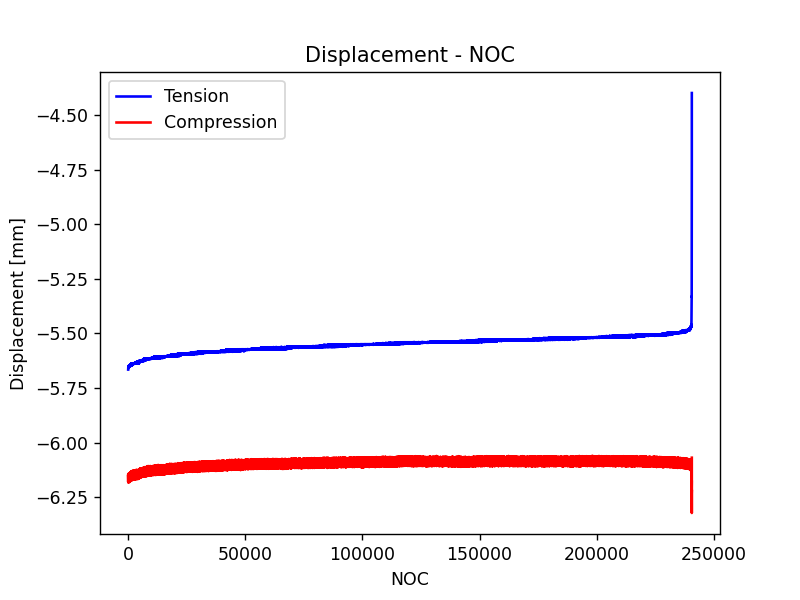

In [39]:
%matplotlib notebook
#comp[0]
plt.plot(NOC[0:240625], comp[0:240625],color='blue',label = 'Tension')
plt.plot(NOC[0:240625], tens[0:240625],color='red',label = 'Compression')

plt.title('Displacement - NOC')
plt.xlabel('NOC')
plt.ylabel('Displacement [mm]')
plt.legend()
#save_name3 = filename.split('Kristin')[1] + '.pdf'
#save_name1 = save_name3.split('.asc')[0]+' ' +'F-U' + '.pdf'
save_name2 = r'D:\.master\Master\Figurer\Testlogg\4.pdf'
save_name = save_name2 
#plt.savefig(save_name) #os.path.join(my_path, save_name)
plt.show()

<IPython.core.display.Javascript object>


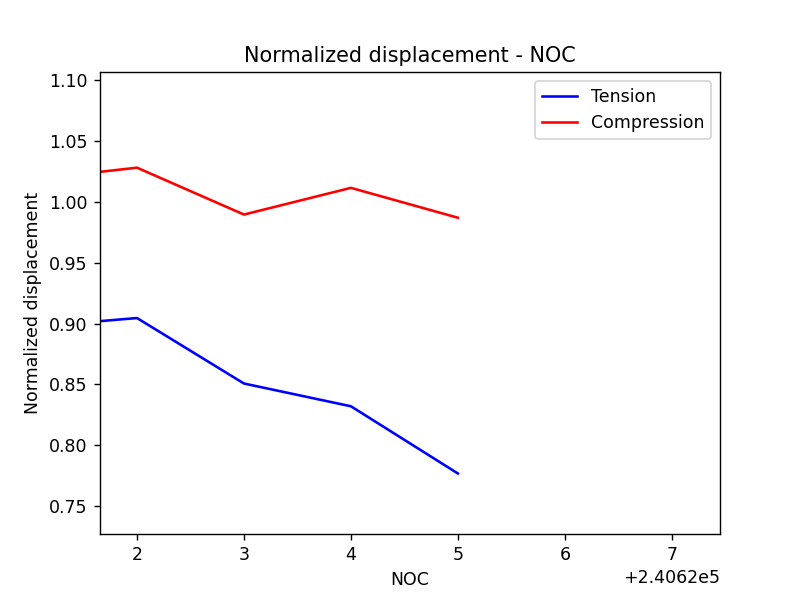

In [40]:
%matplotlib notebook
#comp[0]
plt.plot(NOC[0:240625], comp[0:240625]/comp[0],color='blue',label = 'Tension')
plt.plot(NOC[0:240625], tens[0:240625]/tens[0],color='red',label = 'Compression')

plt.title('Normalized displacement - NOC')
plt.xlabel('NOC')
plt.ylabel('Normalized displacement')
plt.legend()
#save_name3 = filename.split('Kristin')[1] + '.pdf'
#save_name1 =  Norm.pdf   #save_name3.split('.asc')[0]+' ' +'F-U' + '.pdf'
save_name2 = r'D:\.master\Master\Figurer\Testlogg\4Norm.pdf'
save_name = save_name2 
#plt.savefig(save_name) #os.path.join(my_path, save_name)
plt.show()

<IPython.core.display.Javascript object>


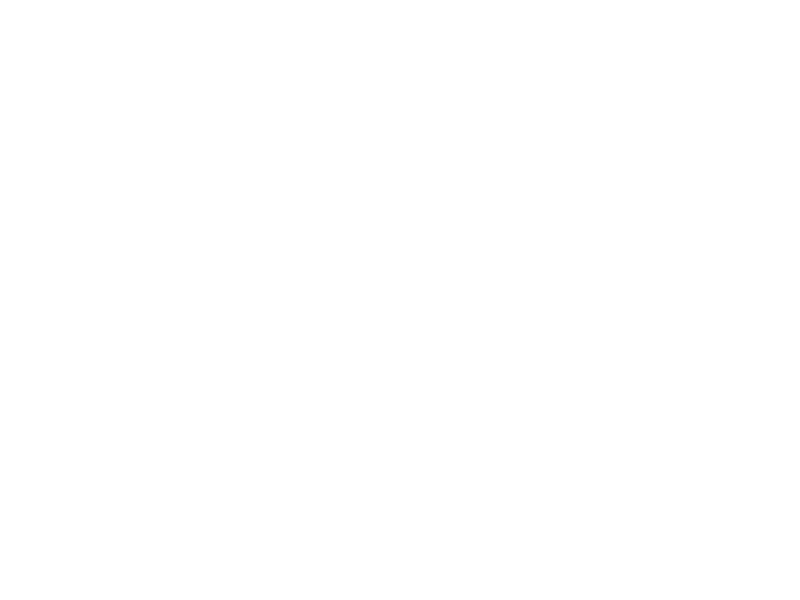

In [19]:
%matplotlib notebook

plt.plot(d[0:asd], f[0:asd],color='red',label = 'Stiffness')
#plt.plot(d, f,color='red',label = 'Stiffness')
#plt.plot(NOC, 1-stigningstall/stigningstall[1])
#/stigningstall[1]

plt.title('Force - Displacement')
plt.ylabel('Force [kN]')
plt.xlabel('Displacement [mm]')
#plt.legend()
save_name3 = filename.split('Kristin')[1] + '.pdf'
save_name1 = save_name3.split('.asc')[0]+' ' +'F-U' + '.pdf'
save_name2 = r'D:\.master\Master\Figurer\Testlogg\Gran'
save_name = save_name2 + save_name1
plt.savefig(save_name) #os.path.join(my_path, save_name)
#plt.show()

<IPython.core.display.Javascript object>


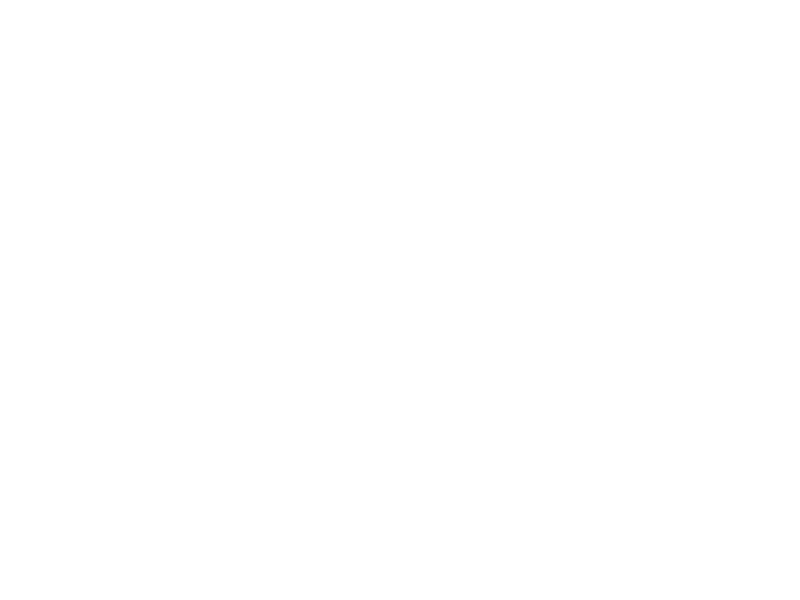

In [20]:
%matplotlib notebook

oter = (int(len(d)/50)-11)

plt.plot(d[0:50], f[0:50],color='red',label = 'Loop 1')
#plt.plot(d[50*10:50*11], f[50*10:50*11],color='blue',label = 'Loop 10')
#plt.plot(d[50*100:50*101], f[50*100:50*101],color='green',label = 'Loop 100')
#plt.plot(d[50*(oter):50*(oter+1)], f[50*(oter):50*(oter+1)],color='black',label = 'Loop 1379')
#plt.plot(d, f,color='red',label = 'Stiffness')
#plt.plot(NOC, 1-stigningstall/stigningstall[1])
#/stigningstall[1]
#200*(1379-25)

plt.title('Force - Displacement')
plt.ylabel('Force [kN]')
plt.xlabel('Displacement [mm]')
plt.legend()
#save_name3 = filename.split('Kristin')[1] + '.pdf'
#save_name1 = save_name3.split('.asc')[0]+' ' +'F-U' + '.pdf'
#save_name2 = r'D:\.master\Master\Figurer\Testlogg\Gran'
#save_name = save_name2 + save_name1
#plt.savefig(save_name) #os.path.join(my_path, save_name)
plt.show()

<IPython.core.display.Javascript object>


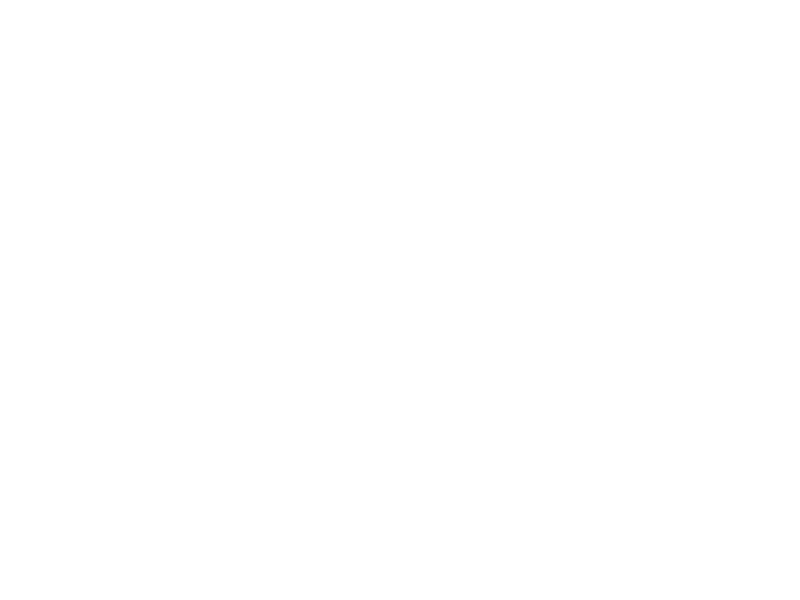

In [21]:
%matplotlib notebook


plt.plot(NOC, E,color='red',label = 'Stiffness')
#plt.plot(NOC[0:lol], E[0:lol],color='red',label = 'Stiffness')

plt.title('Energy - NOC')
plt.ylabel('Energy [J]')
plt.xlabel('Number of cycles')
#plt.legend()
save_name3 = filename.split('Kristin')[1] + '.pdf'
save_name1 = save_name3.split('.asc')[0]+' ' +'E-T' + '.pdf'
save_name2 = r'D:\.master\Master\Figurer\Testlogg\Gran'
save_name = save_name2 + save_name1
plt.savefig(save_name) #os.path.join(my_path, save_name)
plt.show()

<IPython.core.display.Javascript object>


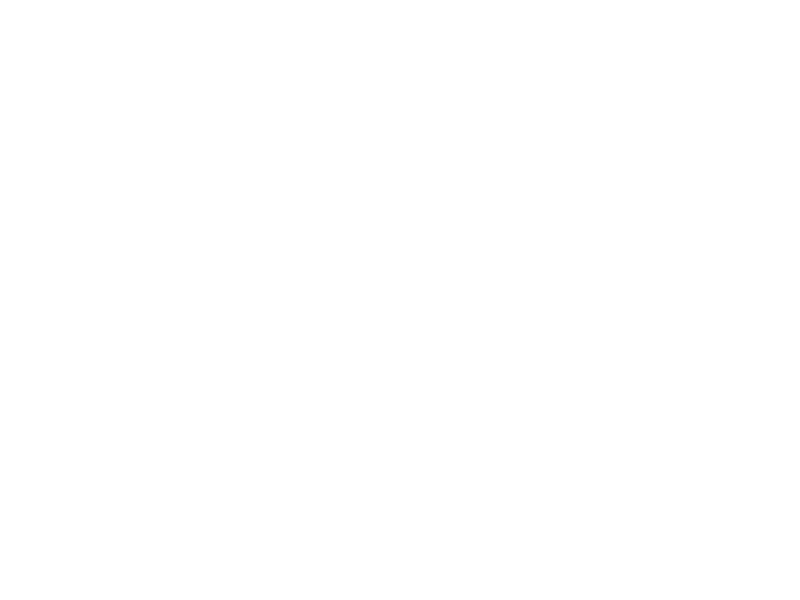

In [22]:
%matplotlib notebook

plt.plot(NOC[0:lol], stigningstall[0:lol],color='red',label = 'Stiffness')
plt.title('NOC - Stiffness')
plt.ylabel('Stiffness [kN/mm]')
plt.xlabel('Number of cycles')
save_name3 = filename.split('Kristin')[1] + '.pdf'
save_name1 = save_name3.split('.asc')[0]+' ' +'NOC-stiffness' + '.pdf'
save_name2 = r'D:\.master\Master\Figurer\Testlogg\Gran'
save_name = save_name2 + save_name1
plt.savefig(save_name) #os.path.join(my_path, save_name)
#plt.show()

In [23]:
# Defining the endpoints of the linear part of the stiffness curve. 
s1 = int(len(stigningstall)*0.001)
s2 = int(len(stigningstall)*0.93)

<IPython.core.display.Javascript object>


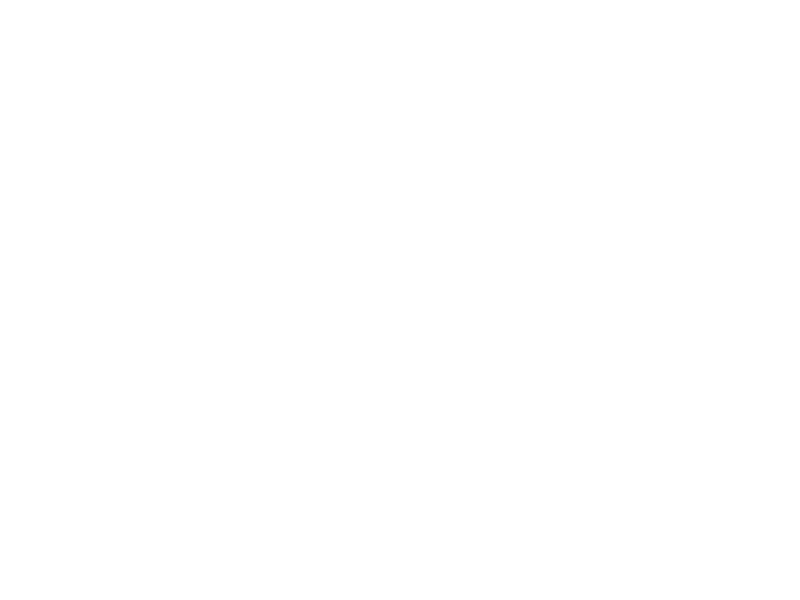

In [24]:
%matplotlib notebook


#plt.plot(NOC, stigningstall,color='red',label = 'Stiffness')
plt.plot(NOC[0:lol], stigningstall[0:lol],color='red',label = 'Stiffness')
plt.plot(s1,stigningstall[s1],'x',color='black',label='Start')
plt.plot(s2,stigningstall[s2],'bx',label='Stop')

#plt.plot(NOC, 1-stigningstall/stigningstall[1])
#/stigningstall[1]

plt.title('Stiffness - NOC')
plt.ylabel('Stiffness [kN/mm]')
plt.xlabel('Number of cycles')
#plt.ylim(47,52)
plt.ylim(max_value-16,max_value+0.2)
#plt.legend()
# plt.gcf().savefig(__file__.rstrip('.py').split('/')[-1] + ".pdf")
#plt.savefig(r'D:\.master\Master\Figurer\Testlogg\Furu\Test 20.pdf')
#save_name1 = filename.split('.asc')[0] + '.pdf'
save_name3 = filename.split('Kristin')[1] + '.pdf'
save_name1 = save_name3.split('.asc')[0]+' ' +'K-NOC zoom' + '.pdf'
save_name2 = r'D:\.master\Master\Figurer\Testlogg\Gran'
save_name = save_name2 + save_name1
plt.savefig(save_name) #os.path.join(my_path, save_name)
plt.legend()
plt.show()

<IPython.core.display.Javascript object>


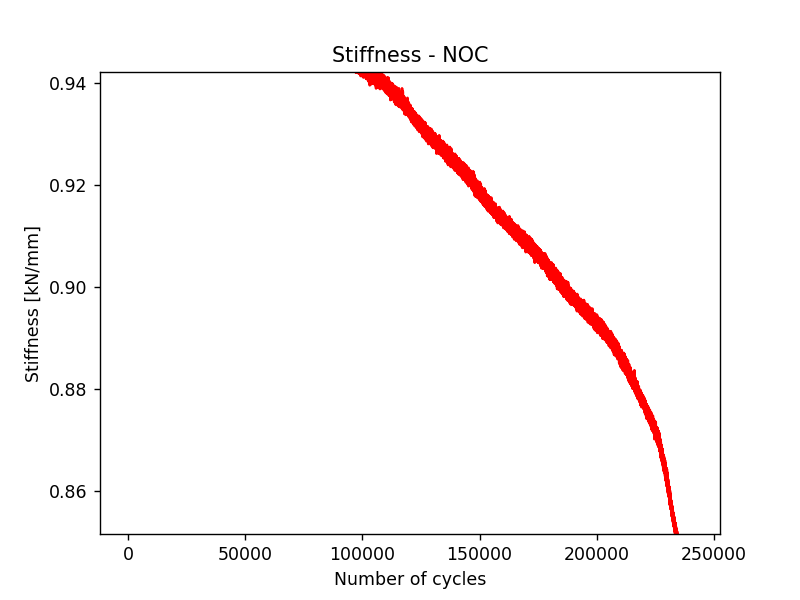

In [25]:
%matplotlib notebook

plt.plot(NOC[0:lol], stigningstall[0:lol]/stigningstall[1],color='red',label = 'Stiffness')
#max_value
plt.title('Stiffness - NOC')
plt.ylabel('Stiffness [kN/mm]')
plt.xlabel('Number of cycles')

plt.ylim(47/stigningstall[1],52/stigningstall[1])
#plt.ylim((max_value-14)/stigningstall[1],(max_value)/stigningstall[1])
save_name3 = filename.split('Kristin')[1] + '.pdf'
save_name1 = save_name3.split('.asc')[0]+' ' +'K-NOC normalisert' + '.pdf'
save_name2 = r'D:\.master\Master\Figurer\Testlogg\Gran'
save_name = save_name2 + save_name1
plt.savefig(save_name) #os.path.join(my_path, save_name)

plt.show()

In [26]:
print('s1 =',s1)
print('s2 =',s2)

print('Modus 2')

endring = stigningstall[s1]-stigningstall[s2]
endring_sykel = endring/(s2-s1)
print('Stiffness')
print('Endring s1-s2=', endring) 
print('Endring % =', endring/stigningstall[s1],'%')
print('Endring per sykel =',endring_sykel)

print('E mod 2 =',sum(E[s1:s2]))
print('E / cycle =',sum(E[s1:s2])/(s2-s1),'J/cycle')
k1 = np.average(stigningstall[s1:s2])
ksi1 = ((sum(E[s1:s2])/(s2-s1)) * k1) * (2*pi * (F_amp)**2)**-1
print('ksi1 =', ksi1)

##### Energi og demping ############
print('Energy')

#print(E[s1:s2])

print('sum(E[0:lol] =',sum(E[0:lol]))
print('E =',E_sykel,'J/cycle')
print('E_tot =', E_sum,'J')


k = np.average(stigningstall[0:lol])
print('Average k =', k)

ksi = (E_sykel * k) * (2*pi * (F_amp)**2)**-1
print('ksi =',ksi)

s1 = 240
s2 = 223928
Modus 2
Stiffness
Endring s1-s2= 6.969189465899845
Endring % = 0.12638257635941416 %
Endring per sykel = 3.1155848619057996e-05
E mod 2 = 55393.68973325995
E / cycle = 0.24763818234889645 J/cycle
ksi1 = 0.00748643866966408
Energy
sum(E[0:lol] = 60762.51467570504
E = 0.2523902858574525 J/cycle
E_tot = 60771.290199614996 J
Average k = 51.32588848968743
ksi = 0.007581980525399408
